### MPL Finance

In [1]:
import pandas as pd
import yfinance as yf
import talib

import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

In [2]:
# list of tickers we're interested in
stock_list = ['AAPL', 'SPY', 'ARKK', 'F', 'NKE']

# empty dictionary to store dataframes as we collect them
stock_dict = {}

# use yfinance to get historical data
for stock in stock_list:
    temp = yf.Ticker(stock)
    temp = temp.history(start='2020-9-1')
    stock_dict[stock] = temp
    
stock_dict['SPY'].head()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [3]:
# calculating technical indicators with ta-lib
for stock, df in stock_dict.items():
    # simple moving average
    df['sma'] = talib.SMA(df.Close)
    # rsi
    df['rsi'] = talib.RSI(df.Close)
    # bollinger bands
    df['upper'], df['middle'], df['lower'] = talib.BBANDS(df.Close)
    
# print a sample
stock_dict['SPY'].head()

KeyError: 'SPY'

### MPF Available Styles
'binance','blueskies','brasil','charles','checkers','classic','default','mike','nightclouds','sas','starsandstripes','yahoo'

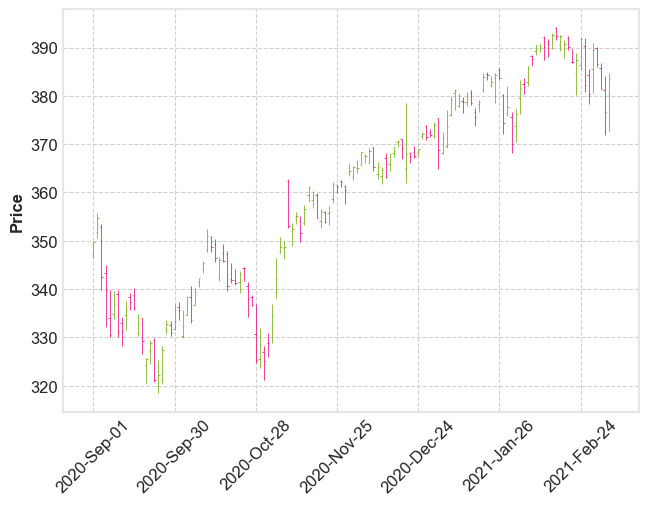

In [21]:
# matplotlib finance to plot ohlc chart
mpf.plot(stock_dict['SPY'], style='binance')
plt.show()

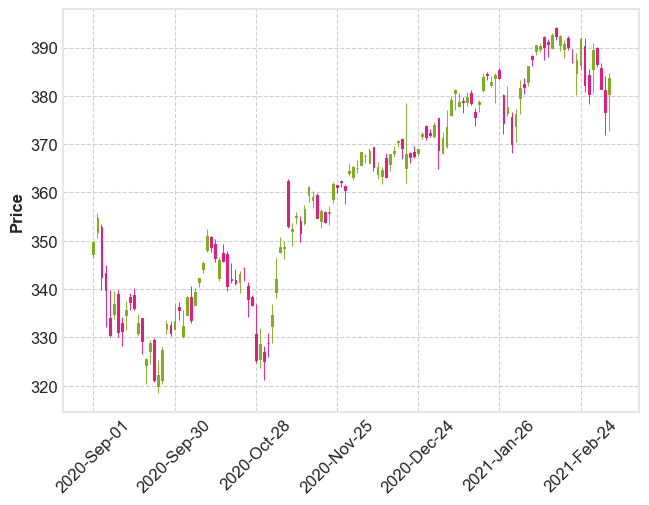

In [22]:
# matplotlib finance to plot candlestick chart
mpf.plot(stock_dict['SPY'], type='candle', style='binance')
plt.show()

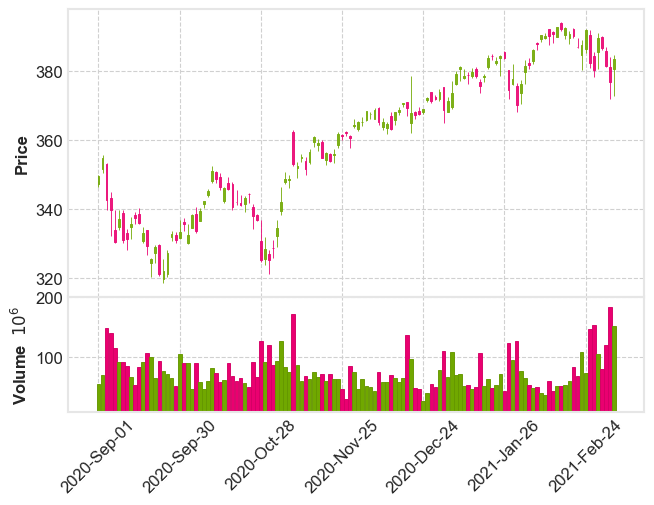

In [23]:
# adding volume data
mpf.plot(stock_dict['SPY'], type='candle', style='binance', volume=True)
plt.show()

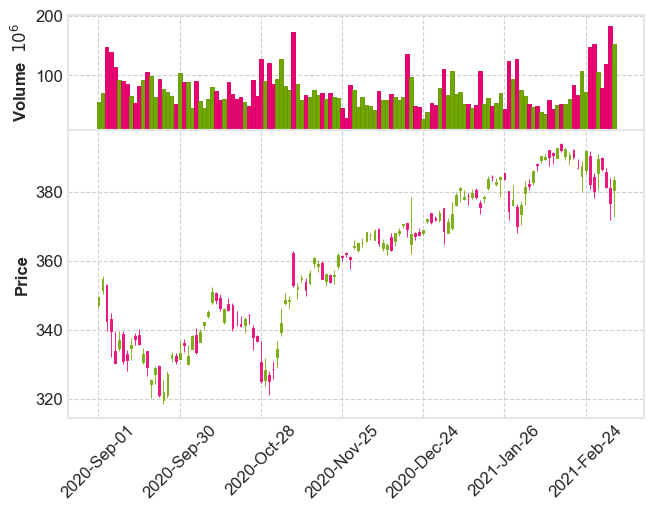

In [24]:
# switching volume and candlestick plots
mpf.plot(stock_dict['SPY'], type='candle', volume=True, main_panel=1, volume_panel=0, style='binance')

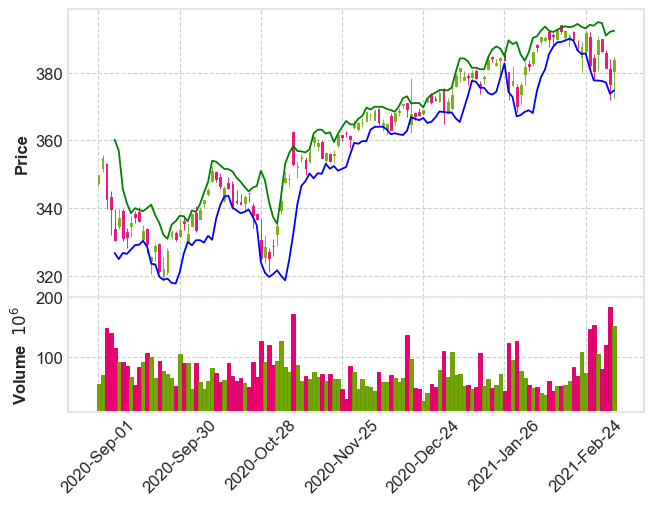

In [25]:
# adding Bollinger Bands
addplots = [mpf.make_addplot(stock_dict['SPY']['upper'],color='g'),
            mpf.make_addplot(stock_dict['SPY']['lower'],color='b'),
           ]
mpf.plot(stock_dict['SPY'], type='candle', volume=True, addplot=addplots, style='binance') 
plt.show()

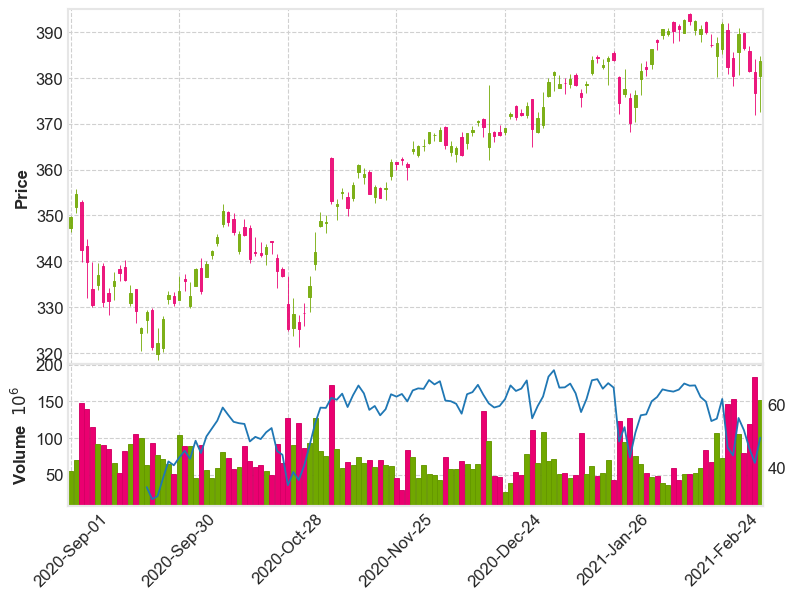

In [31]:
# we can also pass in keyword arguments
# plotting rsi on second panel
kws=dict(volume=True,tight_layout=True)
addplots = mpf.make_addplot(stock_dict['SPY'].rsi,type='line', panel=1)
mpf.plot(stock_dict['SPY'], type='candle', **kws, style='binance',addplot=addplots)
plt.show()